<a href="https://colab.research.google.com/github/linyuehzzz/census_privacy/blob/main/franklin_data_census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


#### **Add GEOID10 (block)**

In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd
filename = 'franklin/sf1/franklin_P20.csv'
data = pd.read_csv(filename)
data['STATE'] = data['STATE'].apply('{:0>2}'.format)
data['COUNTY'] = data['COUNTY'].apply('{:0>3}'.format)
data['TRACT'] = data['TRACT'].apply('{:0>6}'.format)
data['BLOCK'] = data['BLOCK'].apply('{:0>4}'.format)
data['GEOID10'] = data[['STATE', 'COUNTY', 'TRACT', 'BLOCK']].apply(lambda x: ''.join(x), axis=1)
data

data.to_csv(filename, index=False)

#### **Constraint variables (block + race + sex + age)**
P012A - G in SF1

In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd
import numpy as np
import csv

tl = ["A", "B", "C", "D", "E", "F", "G"]
for a in tl:
    input = "franklin/sf1/franklin_P12" + a + ".csv"
    data = pd.read_csv(input)
    table = "P012" + a
    race = tl.index(a) + 1

    for sex in [1, 2]:
        o_id = (race - 1) * 2 + sex
        output = "franklin/microdata/by_race/franklin_md" + str(o_id) + ".csv"

        # male: table + "003" - table + "025"
        # female: table + "027" - table + "049"
        start = 3 if sex == 1 else 27    # 3 or 27

        with open(output, 'w', newline='') as csvfile:
            writer = csv.writer(csvfile, delimiter=',')
            writer.writerow(["GEOID10", "race", "sex", "age", "age_v"])
            for index, row in data.iterrows():
                GEOID10 = row["GEOID10"]
                # print(GEOID10)
                for k in range(start, start + 23):
                    age = k - 2 if sex == 1 else k - 26
                    col_name = table + str(k).zfill(3)
                    cnt = row[col_name]
                    for i in range(cnt):
                        if age == 1:
                            age_v = np.random.randint(0, 4, size=1)[0]
                        elif age == 2:
                            age_v = np.random.randint(5, 9, size=1)[0]
                        elif age == 3:
                            age_v = np.random.randint(10, 14, size=1)[0]
                        elif age == 4:
                            age_v = np.random.randint(15, 17, size=1)[0]
                        elif age == 5:
                            age_v = np.random.randint(18, 19, size=1)[0]
                        elif age == 6:
                            age_v = 20
                        elif age == 7:
                            age_v = 21
                        elif age == 8:
                            age_v = np.random.randint(22, 24, size=1)[0]
                        elif age == 9:
                            age_v = np.random.randint(25, 29, size=1)[0]
                        elif age == 10:
                            age_v = np.random.randint(30, 34, size=1)[0]
                        elif age == 11:
                            age_v = np.random.randint(35, 39, size=1)[0]
                        elif age == 12:
                            age_v = np.random.randint(40, 44, size=1)[0]
                        elif age == 13:
                            age_v = np.random.randint(45, 49, size=1)[0]
                        elif age == 14:
                            age_v = np.random.randint(50, 54, size=1)[0]
                        elif age == 15:
                            age_v = np.random.randint(55, 59, size=1)[0]
                        elif age == 16:
                            age_v = np.random.randint(60, 61, size=1)[0]
                        elif age == 17:
                            age_v = np.random.randint(62, 64, size=1)[0]
                        elif age == 18:
                            age_v = np.random.randint(65, 66, size=1)[0]
                        elif age == 19:
                            age_v = np.random.randint(67, 69, size=1)[0]
                        elif age == 20:
                            age_v = np.random.randint(70, 74, size=1)[0]
                        elif age == 21:
                            age_v = np.random.randint(75, 79, size=1)[0]
                        elif age == 22:
                            age_v = np.random.randint(80, 84, size=1)[0]
                        else:
                            age_v = np.random.randint(85, 100, size=1)[0]
                        writer.writerow([GEOID10, race, sex, age, age_v])

In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
# merge all files into one
import pandas as pd
import glob
import os
  
joined_files = os.path.join("franklin/microdata/by_race", "franklin_md*.csv")
joined_list = glob.glob(joined_files)
df = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)
df = df.sort_values(by=["GEOID10", "age"])
df.to_csv("franklin/microdata/franklin_people_all.csv", index=False)
df

,GEOID10,race,sex,age,age_v
11859,390490001101001,1,1,9,28
439505,390490001101001,7,2,9,27
469606,390490001101002,1,2,1,0
469607,390490001101002,1,2,1,3
469608,390490001101002,1,2,2,7
...,...,...,...,...,...
708823,390490107001020,1,2,21,75
245500,390490107001020,1,1,23,95
708824,390490107001020,1,2,23,97
245501,390499800001027,1,1,20,70


#### **Link block to PUMA**

In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd

filename_id = 'franklin/sf1/franklin_P20.csv'
data_id = pd.read_csv(filename_id)
ids = data_id["GEOID10"]

filename_p = 'franklin/microdata/franklin_people_all.csv'
data_p = pd.read_csv(filename_p)
data_p["PUMA"] = 0

filename_pums = 'franklin/pums/block_pums10.csv'
data_pums = pd.read_csv(filename_pums)

for GEOID10 in ids:
    puma = data_pums[data_pums["GEOID10"] == GEOID10]["PUMA"].iloc[0]
    data_p.loc[data_p["GEOID10"] == GEOID10, "PUMA"] = puma

data_p.to_csv("franklin/microdata/franklin_people_allv2.csv", index=False)
data_p

,GEOID10,race,sex,age,age_v,PUMA
0,390490001101001,1,1,9,28,3904102
1,390490001101001,7,2,9,27,3904102
2,390490001101002,1,2,1,0,3904102
3,390490001101002,1,2,1,3,3904102
4,390490001101002,1,2,2,7,3904102
...,...,...,...,...,...,...
1163409,390490107001020,1,2,21,75,3904102
1163410,390490107001020,1,1,23,95,3904102
1163411,390490107001020,1,2,23,97,3904102
1163412,390499800001027,1,1,20,70,3904106


#### **Extract PUMS in Franklin county**

In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd

filename_pums = 'franklin/pums/psam_p39.csv'
data_pums = pd.read_csv(filename_pums)
data_pums

C:\Users\10716\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,PWGTP,AGEP,...,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
0,P,2015000000028,3,1,1100,2,39,1080470,24,34,...,21,8,28,21,24,23,8,26,26,19
1,P,2015000000028,3,2,1100,2,39,1080470,20,41,...,20,6,21,19,22,22,7,22,19,19
2,P,2015000000028,3,3,1100,2,39,1080470,21,9,...,21,6,21,20,20,19,6,21,20,20
3,P,2015000000028,3,4,1100,2,39,1080470,27,21,...,29,8,24,26,25,23,10,31,28,28
4,P,2015000000029,3,1,902,2,39,1080470,12,36,...,12,10,20,13,4,11,20,20,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593061,P,2019HU1412302,3,2,910,2,39,1010145,9,58,...,15,9,9,3,3,16,16,2,9,10
593062,P,2019HU1412302,3,3,910,2,39,1010145,12,17,...,18,13,12,3,4,17,21,3,11,13
593063,P,2019HU1412396,3,1,2800,2,39,1010145,42,53,...,65,57,38,13,17,40,54,16,67,38
593064,P,2019HU1412396,3,2,2800,2,39,1010145,24,55,...,39,42,27,8,7,22,31,8,42,22


In [ ]:
pums_fra = data_pums[(data_pums["PUMA"] <= 4111) & (data_pums["PUMA"] >= 4101)]
pums_fra

,RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,PWGTP,AGEP,...,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
14,P,2015000000146,3,1,4103,2,39,1080470,35,48,...,58,36,37,41,40,38,10,35,61,11
15,P,2015000000146,3,2,4103,2,39,1080470,30,48,...,48,28,31,33,35,32,9,32,51,10
16,P,2015000000146,3,3,4103,2,39,1080470,19,18,...,42,21,19,17,24,16,5,16,29,4
17,P,2015000000146,3,4,4103,2,39,1080470,28,16,...,44,30,28,28,32,29,8,33,46,9
18,P,2015000000146,3,5,4103,2,39,1080470,30,14,...,46,27,33,30,34,31,8,32,55,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592956,P,2019HU1411052,3,1,4102,2,39,1010145,15,63,...,7,22,4,11,16,24,20,13,5,4
592957,P,2019HU1411105,3,1,4102,2,39,1010145,10,36,...,10,18,3,9,10,10,15,2,10,16
593001,P,2019HU1411607,3,1,4106,2,39,1010145,48,94,...,16,47,48,41,44,14,46,47,78,54
593026,P,2019HU1411879,3,1,4105,2,39,1010145,12,46,...,15,4,13,14,23,24,3,4,21,19


In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
pums_fra['ST'] = pums_fra['ST'].apply('{:0>2}'.format)
pums_fra['PUMA'] = pums_fra['PUMA'].apply('{:0>5}'.format)
pums_fra['PUMAID'] = pums_fra[['ST', 'PUMA']].apply(lambda x: ''.join(x), axis=1)

pums_fra.to_csv("franklin/pums/franklin_pums10.csv", index=False)
pums_fra

C:\Users\10716\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\10716\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\10716\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,PWGTP,AGEP,...,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80,PUMAID
14,P,2015000000146,3,1,04103,2,39,1080470,35,48,...,36,37,41,40,38,10,35,61,11,3904103
15,P,2015000000146,3,2,04103,2,39,1080470,30,48,...,28,31,33,35,32,9,32,51,10,3904103
16,P,2015000000146,3,3,04103,2,39,1080470,19,18,...,21,19,17,24,16,5,16,29,4,3904103
17,P,2015000000146,3,4,04103,2,39,1080470,28,16,...,30,28,28,32,29,8,33,46,9,3904103
18,P,2015000000146,3,5,04103,2,39,1080470,30,14,...,27,33,30,34,31,8,32,55,8,3904103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592956,P,2019HU1411052,3,1,04102,2,39,1010145,15,63,...,22,4,11,16,24,20,13,5,4,3904102
592957,P,2019HU1411105,3,1,04102,2,39,1010145,10,36,...,18,3,9,10,10,15,2,10,16,3904102
593001,P,2019HU1411607,3,1,04106,2,39,1010145,48,94,...,47,48,41,44,14,46,47,78,54,3904106
593026,P,2019HU1411879,3,1,04105,2,39,1010145,12,46,...,4,13,14,23,24,3,4,21,19,3904105


#### **Assign individuals to households**

Create enumeration data set for households.

In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd
import numpy as np

filename_h0 = 'franklin/sf1/franklin_P20.csv'
data_h0 = pd.read_csv(filename_h0)
data_h0 = data_h0.sort_values(by=["GEOID10"])
data_h0

/content/gdrive/My Drive/Colab Notebooks/census_privacy


,FILEID,STUSAB,SUMLEV,LOGRECNO,REGION,DIVISION,STATE,COUNTY,TRACT,BLOCK,P0200001,P0200002,P0200026,GEOID10
744,SF1ST,OH,101,110300,2,3,39,49,110,1000,0,0,0,390490001101000
745,SF1ST,OH,101,110301,2,3,39,49,110,1001,1,0,1,390490001101001
746,SF1ST,OH,101,110302,2,3,39,49,110,1002,21,6,15,390490001101002
747,SF1ST,OH,101,110303,2,3,39,49,110,1003,28,1,27,390490001101003
748,SF1ST,OH,101,110304,2,3,39,49,110,1004,30,5,25,390490001101004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18366,SF1ST,OH,101,129245,2,3,39,49,980000,1070,0,0,0,390499800001070
18367,SF1ST,OH,101,129246,2,3,39,49,980000,1071,0,0,0,390499800001071
18368,SF1ST,OH,101,129247,2,3,39,49,980000,1072,0,0,0,390499800001072
18369,SF1ST,OH,101,129248,2,3,39,49,980000,1073,0,0,0,390499800001073


In [ ]:
sum(data_h0["P0200001"])

477235

In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import csv

output = "franklin/microdata/franklin_households_all.csv"
count_all = 0
with open(output, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(["STATEFP10","COUNTYFP10","TRACTCE10","BLOCKCE10","GEOID10","HouseholdID","HouseholdID_all"])
    for index, row in data_h0.iterrows():
        count = row["P0200001"]
        for i in range(count):
            writer.writerow([row["STATE"], row["COUNTY"], row["TRACT"], row["BLOCK"], row["GEOID10"], i + 1, count_all + i + 1])
        count_all += count

/content/gdrive/My Drive/Colab Notebooks/census_privacy


Read synthetic population data for individuals.

In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd

filename_p = 'franklin/microdata/franklin_peoplev0.csv'
data_p = pd.read_csv(filename_p)
data_p

/content/gdrive/My Drive/Colab Notebooks/census_privacy


,GEOID10,PUMAID,SEX,RAC1P,AGEP,DIS,MSP,MIG,MIL,SCHL,FOD1P,HICOV,PRIVCOV,PUBCOV,PINCP,POVPIP,COW,ESR,SOCP,JWMNP,JWRIP,JWTRNS,HouseholdID
0,390490001101001,3904102,1,1,26,2,6.0,3.0,4.0,19.0,NaN,2,2,2,25000.0,495.0,6.0,1.0,1191XX,5.0,1.0,1.0,1
1,390490001101001,3904102,2,9,26,2,6.0,3.0,4.0,19.0,NaN,1,1,2,20000.0,162.0,1.0,1.0,37201X,5.0,2.0,1.0,1
2,390490001101002,3904102,2,1,1,2,NaN,3.0,NaN,NaN,NaN,2,2,2,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,4
3,390490001101002,3904102,2,1,4,2,NaN,1.0,NaN,2.0,NaN,1,1,2,NaN,501.0,NaN,NaN,NaN,NaN,NaN,NaN,5
4,390490001101002,3904102,2,1,8,2,NaN,1.0,NaN,4.0,NaN,1,1,2,NaN,491.0,NaN,NaN,NaN,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138714,390490107001020,3904102,2,1,77,1,3.0,1.0,4.0,19.0,NaN,1,2,1,17200.0,144.0,NaN,6.0,NaN,NaN,NaN,NaN,70
1138715,390490107001020,3904102,1,1,94,2,1.0,1.0,2.0,22.0,5200.0,1,1,1,5200.0,266.0,NaN,6.0,NaN,NaN,NaN,NaN,108
1138716,390490107001020,3904102,2,1,94,1,6.0,1.0,4.0,16.0,NaN,1,2,1,0.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,95
1138717,390499800001027,3904106,1,1,74,2,2.0,1.0,4.0,15.0,NaN,1,1,1,33300.0,221.0,NaN,6.0,NaN,NaN,NaN,NaN,1


Assign household IDs to individuals.

In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd
import numpy as np

filename_h = 'franklin/sf1/franklin_P20.csv'
data_h = pd.read_csv(filename_h)
data_h = data_h.sort_values(by=["GEOID10"])

filename_p = 'franklin/microdata/franklin_peoplev0.csv'
data_p = pd.read_csv(filename_p)
data_p["HouseholdID"] = 0

for index_h, row_h in data_h.iterrows():
    GEOID10 = row_h["GEOID10"]
    # number of households by age
    n = row_h["P0200001"]
    n_1 = row_h["P0200002"] # with 18 years below
    n_2 = row_h["P0200026"] # without 18 years below

    N = len(data_p[data_p["GEOID10"] == GEOID10])
    N_1 = len(data_p[(data_p["GEOID10"] == GEOID10) & (data_p["AGEP"] < 18)])
    N_2 = len(data_p[(data_p["GEOID10"] == GEOID10) & (data_p["AGEP"] >= 18)])
    # print(N, N_1, N_2, n, n_1, n_2)
    if N >= n:
        if n > 0 and n_1 > 0 and N_1 >= n_1 and N_2 >= n:
            # below 18 years
            l_1 = np.concatenate((np.arange(1, n_1 + 1), np.random.randint(1, n_1 + 1, size = N_1 - n_1)))
            np.random.shuffle(l_1)
            data_p.loc[(data_p["GEOID10"] == GEOID10) & (data_p["AGEP"] < 18), "HouseholdID"] = l_1

            # 18 years and above
            l_2 = np.concatenate((np.arange(1, n + 1), np.random.randint(1, n + 1, size = N_2 - n)))
            np.random.shuffle(l_2)
            data_p.loc[(data_p["GEOID10"] == GEOID10) & (data_p["AGEP"] >= 18), "HouseholdID"] = l_2
        elif n_1 == 0 and N_1 == 0 and n != 0 and N_2 != 0:
            # 18 years and above
            l_2 = np.concatenate((np.arange(1, n + 1), np.random.randint(1, n + 1, size = N_2 - n)))
            np.random.shuffle(l_2)
            data_p.loc[(data_p["GEOID10"] == GEOID10) & (data_p["AGEP"] >= 18), "HouseholdID"] = l_2

data_p = data_p[data_p["HouseholdID"] != 0]
data_p.to_csv("franklin/microdata/franklin_peoplev0_2.csv", index=False)
data_p

,GEOID10,PUMAID,SEX,RAC1P,AGEP,DIS,MSP,MIG,MIL,SCHL,...,PUBCOV,PINCP,POVPIP,COW,ESR,SOCP,JWMNP,JWRIP,JWTRNS,HouseholdID
0,390490001101001,3904102,1,1,26,2,6.0,3.0,4.0,19.0,...,2,25000.0,495.0,6.0,1.0,1191XX,5.0,1.0,1.0,1
1,390490001101001,3904102,2,9,26,2,6.0,3.0,4.0,19.0,...,2,20000.0,162.0,1.0,1.0,37201X,5.0,2.0,1.0,1
2,390490001101002,3904102,2,1,1,2,NaN,3.0,NaN,NaN,...,2,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,4
3,390490001101002,3904102,2,1,4,2,NaN,1.0,NaN,2.0,...,2,NaN,501.0,NaN,NaN,NaN,NaN,NaN,NaN,5
4,390490001101002,3904102,2,1,8,2,NaN,1.0,NaN,4.0,...,2,NaN,491.0,NaN,NaN,NaN,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152599,390490107001020,3904102,2,1,77,1,3.0,1.0,4.0,19.0,...,1,17200.0,144.0,NaN,6.0,NaN,NaN,NaN,NaN,70
1152600,390490107001020,3904102,1,1,94,2,1.0,1.0,2.0,22.0,...,1,5200.0,266.0,NaN,6.0,NaN,NaN,NaN,NaN,108
1152601,390490107001020,3904102,2,1,94,1,6.0,1.0,4.0,16.0,...,1,0.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,95
1152602,390499800001027,3904106,1,1,74,2,2.0,1.0,4.0,15.0,...,1,33300.0,221.0,NaN,6.0,NaN,NaN,NaN,NaN,1


#### **Calculate household income/race/children**

In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd
import numpy as np

filename_h = 'franklin/microdata/franklin_households_all.csv'
data_h = pd.read_csv(filename_h)
data_h = data_h.sort_values(by=["GEOID10", "HouseholdID_all"])
data_h['STATEFP10'] = data_h['STATEFP10'].apply('{:0>2}'.format)
data_h['COUNTYFP10'] = data_h['COUNTYFP10'].apply('{:0>3}'.format)
data_h['TRACTCE10'] = data_h['TRACTCE10'].apply('{:0>6}'.format)
data_h['BLOCKCE10'] = data_h['BLOCKCE10'].apply('{:0>4}'.format)
data_h['GEOID10'] = data_h[['STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'BLOCKCE10']].apply(lambda x: ''.join(x), axis=1)
data_h.to_csv(filename_h, index=False)
data_h

/content/gdrive/My Drive/Colab Notebooks/census_privacy


,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,HouseholdID,HouseholdID_all
0,39,049,000110,1001,390490001101001,1,1
1,39,049,000110,1002,390490001101002,1,2
2,39,049,000110,1002,390490001101002,2,3
3,39,049,000110,1002,390490001101002,3,4
4,39,049,000110,1002,390490001101002,4,5
...,...,...,...,...,...,...,...
477230,39,049,010700,1020,390490107001020,142,477231
477231,39,049,010700,1020,390490107001020,143,477232
477232,39,049,010700,1020,390490107001020,144,477233
477233,39,049,010700,1020,390490107001020,145,477234


In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd
import numpy as np

filename_p = 'franklin/microdata/franklin_peoplev0.csv'
data_p = pd.read_csv(filename_p)
data_p

/content/gdrive/My Drive/Colab Notebooks/census_privacy


,GEOID10,PUMAID,SEX,RAC1P,AGEP,DIS,MSP,MIG,MIL,SCHL,FOD1P,HICOV,PRIVCOV,PUBCOV,PINCP,POVPIP,COW,ESR,SOCP,JWMNP,JWRIP,JWTRNS,HouseholdID,lon,lat
0,390490001101001,3904102,1,1,26,2,6.0,3.0,4.0,19.0,NaN,2,2,2,25000.0,495.0,6.0,1.0,1191XX,5.0,1.0,1.0,1,-83.000282,40.059621
1,390490001101001,3904102,2,9,26,2,6.0,3.0,4.0,19.0,NaN,1,1,2,20000.0,162.0,1.0,1.0,37201X,5.0,2.0,1.0,1,-83.000282,40.059621
2,390490001101002,3904102,2,1,1,2,NaN,3.0,NaN,NaN,NaN,2,2,2,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,4,-83.001238,40.061327
3,390490001101002,3904102,2,1,4,2,NaN,1.0,NaN,2.0,NaN,1,1,2,NaN,501.0,NaN,NaN,NaN,NaN,NaN,NaN,5,-83.002248,40.061617
4,390490001101002,3904102,2,1,8,2,NaN,1.0,NaN,4.0,NaN,1,1,2,NaN,491.0,NaN,NaN,NaN,NaN,NaN,NaN,6,-83.002089,40.061041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138714,390490107001020,3904102,2,1,77,1,3.0,1.0,4.0,19.0,NaN,1,2,1,17200.0,144.0,NaN,6.0,NaN,NaN,NaN,NaN,70,-83.019098,40.063092
1138715,390490107001020,3904102,1,1,94,2,1.0,1.0,2.0,22.0,5200.0,1,1,1,5200.0,266.0,NaN,6.0,NaN,NaN,NaN,NaN,108,-83.018738,40.064614
1138716,390490107001020,3904102,2,1,94,1,6.0,1.0,4.0,16.0,NaN,1,2,1,0.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,95,NaN,NaN
1138717,390499800001027,3904106,1,1,74,2,2.0,1.0,4.0,15.0,NaN,1,1,1,33300.0,221.0,NaN,6.0,NaN,NaN,NaN,NaN,1,-82.881256,40.005658


In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd
import numpy as np

filename_h = 'franklin/microdata/franklin_households_all.csv'
data_h = pd.read_csv(filename_h)
data_h = data_h.sort_values(by=["GEOID10", "HouseholdID_all"])
data_h["Income"] = data_h["Race"] = data_h["Children"] = 0
# data_h["Race"] = data_h["Children"] = 0

filename_p = 'franklin/microdata/franklin_peoplev0.csv'
data_p = pd.read_csv(filename_p)

for index_h, row_h in data_h.iterrows():
    GEOID10 = row_h["GEOID10"]
    HouseholdID = row_h["HouseholdID"]

    sub_p = data_p[(data_p["GEOID10"] == GEOID10) & (data_p["HouseholdID"] == HouseholdID)]
    if len(sub_p) > 0:
        ## race
        race = sub_p["RAC1P"].value_counts().idxmax()

        ## children
        if len(sub_p[sub_p["AGEP"] < 18]) > 0:
            data_h.loc[(data_h["GEOID10"] == GEOID10) & (data_h["HouseholdID"] == HouseholdID), ["Children", "Race"]] = [1, race]
        else:
            data_h.loc[(data_h["GEOID10"] == GEOID10) & (data_h["HouseholdID"] == HouseholdID), "Race"] = race
        
        # income
        sub_p2 = sub_p[sub_p["AGEP"] >= 15]
        if len(sub_p2) > 0:
            income = np.mean(sub_p2["PINCP"])
            data_h.loc[(data_h["GEOID10"] == GEOID10) & (data_h["HouseholdID"] == HouseholdID), "Income"] = income
        
# data_h = data_h[(data_h["Income"] != 0) & (data_h["Race"] != 0)]
data_h.to_csv("franklin/microdata/franklin_householdsv0.csv", index=False)
data_h

/content/gdrive/My Drive/Colab Notebooks/census_privacy


,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,HouseholdID,HouseholdID_all,Income,Race,Children
0,39,49,110,1001,390490001101001,1,1,22500.0,9,0
1,39,49,110,1002,390490001101002,1,2,36200.0,1,1
2,39,49,110,1002,390490001101002,2,3,22000.0,1,1
3,39,49,110,1002,390490001101002,3,4,36100.0,1,1
4,39,49,110,1002,390490001101002,4,5,21800.0,1,1
...,...,...,...,...,...,...,...,...,...,...
477230,39,49,10700,1020,390490107001020,142,477231,47500.0,1,0
477231,39,49,10700,1020,390490107001020,143,477232,3500.0,1,0
477232,39,49,10700,1020,390490107001020,144,477233,8000.0,1,0
477233,39,49,10700,1020,390490107001020,145,477234,23000.0,2,0


####**Assign household locations**

In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd

filename_census = 'franklin/microdata/franklin_householdsv0.csv'
data_census = pd.read_csv(filename_census)
data_census

/content/gdrive/My Drive/Colab Notebooks/census_privacy


,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,HouseholdID,HouseholdID_all,Income,Race,Children
0,39,49,110,1001,390490001101001,1,1,22500.0,9,0
1,39,49,110,1002,390490001101002,1,2,36200.0,1,1
2,39,49,110,1002,390490001101002,2,3,22000.0,1,1
3,39,49,110,1002,390490001101002,3,4,36100.0,1,1
4,39,49,110,1002,390490001101002,4,5,21800.0,1,1
...,...,...,...,...,...,...,...,...,...,...
477230,39,49,10700,1020,390490107001020,142,477231,47500.0,1,0
477231,39,49,10700,1020,390490107001020,143,477232,3500.0,1,0
477232,39,49,10700,1020,390490107001020,144,477233,8000.0,1,0
477233,39,49,10700,1020,390490107001020,145,477234,23000.0,2,0


In [ ]:
!pip install geopandas

     |████████████████████████████████| 994 kB 8.1 MB/s 
     |████████████████████████████████| 15.4 MB 44.9 MB/s 
     |████████████████████████████████| 6.3 MB 22.8 MB/s 


In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import geopandas as gpd

filename_block = 'franklin/buildings/franklin_block10.json'
data_block = gpd.read_file(filename_block)
data_block

/content/gdrive/My Drive/Colab Notebooks/census_privacy


,OBJECTID_1,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,UATYPE,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,Shape_Leng,PUMA,Shape_Length,Shape_Area,geometry
0,1,1,39,049,006500,4019,390490065004019,Block 4019,G5040,U,19234,U,S,98391,2149,+40.0001827,-083.0802471,0.016835,3904104,0.016835,1.060361e-05,"POLYGON ((-83.08283 40.00301, -83.08280 40.002..."
1,2,2,39,049,007812,2017,390490078122017,Block 2017,G5040,U,19234,U,S,0,2575,+40.0376070,-083.0355367,0.017067,3904105,0.017067,2.716620e-07,"POLYGON ((-83.03954 40.03505, -83.03952 40.035..."
2,3,3,39,049,008380,3046,390490083803046,Block 3046,G5040,R,,,S,0,1099,+39.8858862,-083.0260845,0.002871,3904110,0.002871,1.156665e-07,"POLYGON ((-83.02613 39.88562, -83.02617 39.885..."
3,4,4,39,049,007531,1013,390490075311013,Block 1013,G5040,U,19234,U,S,78927,1630,+40.0527883,-082.9453223,0.017112,3904106,0.017112,8.502607e-06,"POLYGON ((-82.94881 40.05366, -82.94883 40.053..."
4,5,5,39,049,007207,1025,390490072071025,Block 1025,G5040,U,19234,U,S,0,1765,+40.1094785,-082.8392880,0.008204,3904101,0.008204,1.864805e-07,"POLYGON ((-82.83938 40.10938, -82.83945 40.109..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22821,22822,22822,39,049,008230,2008,390490082302008,Block 2008,G5040,U,19234,U,S,18112,0,+39.9455080,-083.1190358,0.005576,3904110,0.005576,1.908732e-06,"POLYGON ((-83.11996 39.94567, -83.11997 39.945..."
22822,22823,22823,39,049,006430,1011,390490064301011,Block 1011,G5040,U,19234,U,S,22932,0,+40.0096213,-083.0492725,0.007361,3904104,0.007361,2.418887e-06,"POLYGON ((-83.05067 40.00971, -83.05070 40.009..."
22823,22824,22824,39,049,009326,1001,390490093261001,Block 1001,G5040,U,19234,U,S,3335,0,+39.9193678,-082.8749815,0.002875,3904108,0.002875,3.512945e-07,"POLYGON ((-82.87536 39.91920, -82.87534 39.919..."
22824,22825,22825,39,049,008242,3029,390490082423029,Block 3029,G5040,U,19234,U,S,12821,0,+39.9760232,-083.0885334,0.006785,3904110,0.006785,1.351719e-06,"POLYGON ((-83.08998 39.97569, -83.08992 39.975..."


In [ ]:
import random
from shapely.geometry import Point

for GEOID in data_census["GEOID10"].unique():
    N = len(data_census[data_census["GEOID10"] == GEOID])
    polygon = data_block[data_block["GEOID10"] == str(GEOID)].geometry
    bounds = list(polygon.bounds.values)
    flag = 0
    pts = []
    while True:
        x = random.uniform(bounds[0][0], bounds[0][2])
        y = random.uniform(bounds[0][1], bounds[0][3])
        if polygon.contains(Point(x, y)).any():
            pt = [x, y]
            pts.append(pt)
            flag += 1
        if flag == N:
            break
    data_census.loc[(data_census["GEOID10"] == GEOID), ["lon", "lat"]] = pts
data_census

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,HouseholdID,HouseholdID_all,Income,Race,Children,lon,lat
0,39,49,110,1001,390490001101001,1,1,22500.0,9,0,-82.999368,40.054253
1,39,49,110,1002,390490001101002,1,2,36200.0,1,1,-83.002000,40.061709
2,39,49,110,1002,390490001101002,2,3,22000.0,1,1,-83.001066,40.061662
3,39,49,110,1002,390490001101002,3,4,36100.0,1,1,-83.001361,40.061693
4,39,49,110,1002,390490001101002,4,5,21800.0,1,1,-83.002695,40.060864
...,...,...,...,...,...,...,...,...,...,...,...,...
477230,39,49,10700,1020,390490107001020,142,477231,47500.0,1,0,-83.017883,40.062917
477231,39,49,10700,1020,390490107001020,143,477232,3500.0,1,0,-83.018137,40.063439
477232,39,49,10700,1020,390490107001020,144,477233,8000.0,1,0,-83.016249,40.065140
477233,39,49,10700,1020,390490107001020,145,477234,23000.0,2,0,-83.018570,40.063048


In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd

filename_census = 'franklin/microdata/franklin_householdsv0.csv'
data_census.to_csv(filename_census, index=False)

/content/gdrive/My Drive/Colab Notebooks/census_privacy


Assign household locations to individuals.

In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd

filename_h = 'franklin/microdata/franklin_householdsv0.csv'
data_h = pd.read_csv(filename_h)
data_h

/content/gdrive/My Drive/Colab Notebooks/census_privacy


,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,HouseholdID,HouseholdID_all,Income,Race,Children,lon,lat
0,39,49,110,1001,390490001101001,1,1,22500.0,9,0,-82.999368,40.054253
1,39,49,110,1002,390490001101002,1,2,36200.0,1,1,-83.002000,40.061709
2,39,49,110,1002,390490001101002,2,3,22000.0,1,1,-83.001066,40.061662
3,39,49,110,1002,390490001101002,3,4,36100.0,1,1,-83.001361,40.061693
4,39,49,110,1002,390490001101002,4,5,21800.0,1,1,-83.002695,40.060864
...,...,...,...,...,...,...,...,...,...,...,...,...
477230,39,49,10700,1020,390490107001020,142,477231,47500.0,1,0,-83.017883,40.062917
477231,39,49,10700,1020,390490107001020,143,477232,3500.0,1,0,-83.018137,40.063439
477232,39,49,10700,1020,390490107001020,144,477233,8000.0,1,0,-83.016249,40.065140
477233,39,49,10700,1020,390490107001020,145,477234,23000.0,2,0,-83.018570,40.063048


In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd

filename_p = 'franklin/microdata/franklin_peoplev0.csv'
data_p = pd.read_csv(filename_p)
data_p = data_p.drop(columns=['lon', 'lat'])
data_p

/content/gdrive/My Drive/Colab Notebooks/census_privacy


,GEOID10,PUMAID,SEX,RAC1P,AGEP,DIS,MSP,MIG,MIL,SCHL,FOD1P,HICOV,PRIVCOV,PUBCOV,PINCP,POVPIP,COW,ESR,SOCP,JWMNP,JWRIP,JWTRNS,HouseholdID
0,390490001101001,3904102,1,1,26,2,6.0,3.0,4.0,19.0,NaN,2,2,2,25000.0,495.0,6.0,1.0,1191XX,5.0,1.0,1.0,1
1,390490001101001,3904102,2,9,26,2,6.0,3.0,4.0,19.0,NaN,1,1,2,20000.0,162.0,1.0,1.0,37201X,5.0,2.0,1.0,1
2,390490001101002,3904102,2,1,1,2,NaN,3.0,NaN,NaN,NaN,2,2,2,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,4
3,390490001101002,3904102,2,1,4,2,NaN,1.0,NaN,2.0,NaN,1,1,2,NaN,501.0,NaN,NaN,NaN,NaN,NaN,NaN,5
4,390490001101002,3904102,2,1,8,2,NaN,1.0,NaN,4.0,NaN,1,1,2,NaN,491.0,NaN,NaN,NaN,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138714,390490107001020,3904102,2,1,77,1,3.0,1.0,4.0,19.0,NaN,1,2,1,17200.0,144.0,NaN,6.0,NaN,NaN,NaN,NaN,70
1138715,390490107001020,3904102,1,1,94,2,1.0,1.0,2.0,22.0,5200.0,1,1,1,5200.0,266.0,NaN,6.0,NaN,NaN,NaN,NaN,108
1138716,390490107001020,3904102,2,1,94,1,6.0,1.0,4.0,16.0,NaN,1,2,1,0.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,95
1138717,390499800001027,3904106,1,1,74,2,2.0,1.0,4.0,15.0,NaN,1,1,1,33300.0,221.0,NaN,6.0,NaN,NaN,NaN,NaN,1


In [ ]:
data_p_new = data_p.merge(data_h[['GEOID10', 'HouseholdID', 'lon', 'lat']], how='left', on=['GEOID10', 'HouseholdID'])
data_p_new.to_csv("franklin/microdata/franklin_peoplev0.csv", index=False)
data_p_new

,GEOID10,PUMAID,SEX,RAC1P,AGEP,DIS,MSP,MIG,MIL,SCHL,FOD1P,HICOV,PRIVCOV,PUBCOV,PINCP,POVPIP,COW,ESR,SOCP,JWMNP,JWRIP,JWTRNS,HouseholdID,lon,lat
0,390490001101001,3904102,1,1,26,2,6.0,3.0,4.0,19.0,NaN,2,2,2,25000.0,495.0,6.0,1.0,1191XX,5.0,1.0,1.0,1,-82.999368,40.054253
1,390490001101001,3904102,2,9,26,2,6.0,3.0,4.0,19.0,NaN,1,1,2,20000.0,162.0,1.0,1.0,37201X,5.0,2.0,1.0,1,-82.999368,40.054253
2,390490001101002,3904102,2,1,1,2,NaN,3.0,NaN,NaN,NaN,2,2,2,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,4,-83.002695,40.060864
3,390490001101002,3904102,2,1,4,2,NaN,1.0,NaN,2.0,NaN,1,1,2,NaN,501.0,NaN,NaN,NaN,NaN,NaN,NaN,5,-83.001629,40.060899
4,390490001101002,3904102,2,1,8,2,NaN,1.0,NaN,4.0,NaN,1,1,2,NaN,491.0,NaN,NaN,NaN,NaN,NaN,NaN,6,-83.001937,40.060852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138714,390490107001020,3904102,2,1,77,1,3.0,1.0,4.0,19.0,NaN,1,2,1,17200.0,144.0,NaN,6.0,NaN,NaN,NaN,NaN,70,-83.017831,40.065591
1138715,390490107001020,3904102,1,1,94,2,1.0,1.0,2.0,22.0,5200.0,1,1,1,5200.0,266.0,NaN,6.0,NaN,NaN,NaN,NaN,108,-83.017814,40.062582
1138716,390490107001020,3904102,2,1,94,1,6.0,1.0,4.0,16.0,NaN,1,2,1,0.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,95,-83.018259,40.064492
1138717,390499800001027,3904106,1,1,74,2,2.0,1.0,4.0,15.0,NaN,1,1,1,33300.0,221.0,NaN,6.0,NaN,NaN,NaN,NaN,1,-82.879433,40.004085


####**Extract NHGIS data in Franklin county**

In [ ]:
# block
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd

filename_nhgis = 'franklin/nhgis/nhgis_ppdd_20210608_block_OH.csv'
data_nhgis = pd.read_csv(filename_nhgis)
data_nhgis["STATE"] = data_nhgis["gisjoin"].str.slice(1, 3)
data_nhgis['COUNTY'] = data_nhgis["gisjoin"].str.slice(4, 7)
data_nhgis['TRACT'] = data_nhgis["gisjoin"].str.slice(8, 14)
data_nhgis['BLOCK'] = data_nhgis["gisjoin"].str.slice(14, 18)
data_nhgis['GEOID10'] = data_nhgis[['STATE', 'COUNTY', 'TRACT', 'BLOCK']].apply(lambda x: ''.join(x), axis=1)
data_nhgis = data_nhgis[data_nhgis["COUNTY"] == '049']
data_nhgis = data_nhgis[['GEOID10', 'H72003_dp', 'H72004_dp', 'H72005_dp', 'H72006_dp', 'H72007_dp', 'H72008_dp', 'H72009_dp', 
                         'H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']]
data_nhgis = data_nhgis.loc[(data_nhgis[['H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']] != 0).any(1)]
data_nhgis.to_csv("franklin/nhgis/franklin_nhgis_block.csv", index=False)
data_nhgis

/content/gdrive/My Drive/Colab Notebooks/census_privacy


,GEOID10,H72003_dp,H72004_dp,H72005_dp,H72006_dp,H72007_dp,H72008_dp,H72009_dp,H72003_sf,H72004_sf,H72005_sf,H72006_sf,H72007_sf,H72008_sf,H72009_sf
97999,390490001101001,4,0,0,0,0,0,1,1,0,0,0,0,0,1
98000,390490001101002,39,0,0,0,0,0,1,45,0,0,0,0,0,0
98001,390490001101003,67,8,0,0,0,0,0,51,4,0,0,0,0,0
98002,390490001101004,48,0,0,1,0,0,1,48,0,0,0,0,0,0
98003,390490001101005,44,6,0,1,0,0,4,51,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120742,390490107001015,95,13,0,0,0,0,1,92,17,0,0,0,1,2
120743,390490107001016,6,4,0,0,0,0,0,9,0,0,0,0,0,0
120744,390490107001017,41,10,0,6,0,2,1,42,6,0,9,0,0,0
120747,390490107001020,165,18,0,7,0,1,1,167,20,0,7,0,1,1


/content/gdrive/My Drive/Colab Notebooks/census_privacy


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


-0.005146899111333566 2.8233444076974767


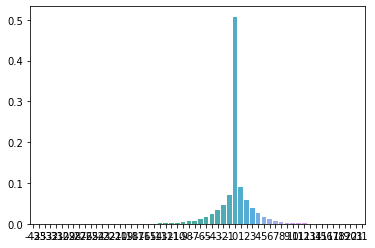

In [10]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
import statsmodels.api as sm
import pylab as py

filename_nhgis_block = 'franklin/nhgis/franklin_nhgis_block.csv'
nhgis_block = pd.read_csv(filename_nhgis_block)

hist1_nhgis = nhgis_block[['H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']]
hist1_nhgis = hist1_nhgis.rename(columns={'H72003_sf': '1', 'H72004_sf': '2', 'H72005_sf': '3', 'H72006_sf': '4', 'H72007_sf': '5', 'H72008_sf': '6', 
                                          'H72009_sf': '7'})
hist2_nhgis = nhgis_block[['H72003_dp', 'H72004_dp', 'H72005_dp', 'H72006_dp', 'H72007_dp', 'H72008_dp', 'H72009_dp']]
hist2_nhgis = hist2_nhgis.rename(columns={'H72003_dp': '1', 'H72004_dp': '2', 'H72005_dp': '3', 'H72006_dp': '4', 'H72007_dp': '5', 'H72008_dp': '6', 
                                          'H72009_dp': '7'})

noise = hist2_nhgis - hist1_nhgis

probabilities = noise.stack().value_counts(normalize=True)    
sns.barplot(probabilities.index, probabilities.values)

data = noise.values.ravel()
mu, std = norm.fit(data)
print(mu, std)

# sm.qqplot(data, line ='45')
# py.show()

In [ ]:
# block group
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd

filename_nhgis = 'franklin/nhgis/nhgis_ppdd_20210608_blck_grp.csv'
data_nhgis = pd.read_csv(filename_nhgis)
data_nhgis["STATE"] = data_nhgis["gisjoin"].str.slice(1, 3)
data_nhgis['COUNTY'] = data_nhgis["gisjoin"].str.slice(4, 7)
data_nhgis['TRACT'] = data_nhgis["gisjoin"].str.slice(8, 14)
data_nhgis['BG'] = data_nhgis["gisjoin"].str.slice(14, 15)
data_nhgis['GEOID10'] = data_nhgis[['STATE', 'COUNTY', 'TRACT', 'BG']].apply(lambda x: ''.join(x), axis=1)
data_nhgis = data_nhgis[(data_nhgis["STATE"] == '39') & (data_nhgis["COUNTY"] == '049')]
data_nhgis = data_nhgis[['GEOID10', 'H72003_dp', 'H72004_dp', 'H72005_dp', 'H72006_dp', 'H72007_dp', 'H72008_dp', 'H72009_dp', 
                         'H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']]
data_nhgis = data_nhgis.loc[(data_nhgis[['H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']] != 0).any(1)]
data_nhgis.to_csv("franklin/nhgis/franklin_nhgis_bg.csv", index=False)
data_nhgis

/content/gdrive/My Drive/Colab Notebooks/census_privacy


,GEOID10,H72003_dp,H72004_dp,H72005_dp,H72006_dp,H72007_dp,H72008_dp,H72009_dp,H72003_sf,H72004_sf,H72005_sf,H72006_sf,H72007_sf,H72008_sf,H72009_sf
152637,390490001101,1025,23,0,7,0,4,15,1040,14,0,8,0,3,15
152638,390490001102,828,3,1,13,1,5,5,814,15,0,18,0,3,7
152639,390490001103,623,7,0,9,1,2,13,619,6,2,6,0,6,9
152640,390490001104,736,9,1,5,1,2,4,744,5,0,4,0,1,5
152641,390490001201,764,5,0,11,0,2,11,758,6,0,11,0,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153519,390490106021,1381,51,5,50,0,15,40,1369,48,4,41,0,17,31
153520,390490106022,2287,57,6,158,0,16,44,2293,59,1,159,0,17,45
153521,390490106023,1816,49,1,212,0,17,34,1824,50,4,220,0,20,37
153522,390490107001,1064,116,4,63,5,19,33,1062,119,4,61,1,19,33


/content/gdrive/My Drive/Colab Notebooks/census_privacy


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.00016105653084232566 7.852655417580383


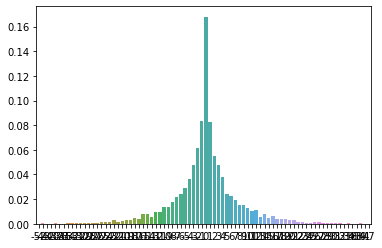

In [11]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
import statsmodels.api as sm
import pylab as py

filename_nhgis_block = 'franklin/nhgis/franklin_nhgis_bg.csv'
nhgis_block = pd.read_csv(filename_nhgis_block)

hist1_nhgis = nhgis_block[['H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']]
hist1_nhgis = hist1_nhgis.rename(columns={'H72003_sf': '1', 'H72004_sf': '2', 'H72005_sf': '3', 'H72006_sf': '4', 'H72007_sf': '5', 'H72008_sf': '6', 
                                          'H72009_sf': '7'})
hist2_nhgis = nhgis_block[['H72003_dp', 'H72004_dp', 'H72005_dp', 'H72006_dp', 'H72007_dp', 'H72008_dp', 'H72009_dp']]
hist2_nhgis = hist2_nhgis.rename(columns={'H72003_dp': '1', 'H72004_dp': '2', 'H72005_dp': '3', 'H72006_dp': '4', 'H72007_dp': '5', 'H72008_dp': '6', 
                                          'H72009_dp': '7'})

noise = hist2_nhgis - hist1_nhgis

probabilities = noise.stack().value_counts(normalize=True)    
sns.barplot(probabilities.index, probabilities.values)

data = noise.values.ravel()
mu, std = norm.fit(data)
print(mu, std)

# sm.qqplot(data, line ='45')
# py.show()

In [4]:
# tract
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd

filename_nhgis = 'franklin/nhgis/nhgis_ppdd_20210608_tract.csv'
data_nhgis = pd.read_csv(filename_nhgis)
data_nhgis["STATE"] = data_nhgis["gisjoin"].str.slice(1, 3)
data_nhgis['COUNTY'] = data_nhgis["gisjoin"].str.slice(4, 7)
data_nhgis['TRACT'] = data_nhgis["gisjoin"].str.slice(8, 14)
data_nhgis['GEOID10'] = data_nhgis[['STATE', 'COUNTY', 'TRACT']].apply(lambda x: ''.join(x), axis=1)
data_nhgis = data_nhgis[(data_nhgis["STATE"] == '39') & (data_nhgis["COUNTY"] == '049')]
data_nhgis = data_nhgis[['GEOID10', 'H72003_dp', 'H72004_dp', 'H72005_dp', 'H72006_dp', 'H72007_dp', 'H72008_dp', 'H72009_dp', 
                         'H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']]
data_nhgis = data_nhgis.loc[(data_nhgis[['H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']] != 0).any(1)]
data_nhgis.to_csv("franklin/nhgis/franklin_nhgis_tract.csv", index=False)
data_nhgis

/content/gdrive/My Drive/Colab Notebooks/census_privacy


,GEOID10,H72003_dp,H72004_dp,H72005_dp,H72006_dp,H72007_dp,H72008_dp,H72009_dp,H72003_sf,H72004_sf,H72005_sf,H72006_sf,H72007_sf,H72008_sf,H72009_sf
51439,39049000110,3212,42,2,34,3,13,37,3217,40,2,36,0,13,36
51440,39049000120,3017,39,6,45,0,8,45,3016,44,3,42,1,7,49
51441,39049000210,2769,48,4,34,0,10,64,2773,52,5,32,0,10,63
51442,39049000220,3546,32,2,52,0,21,74,3536,32,4,55,0,24,76
51443,39049000310,2136,735,4,71,2,63,137,2135,739,3,70,2,61,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51718,39049010500,6496,108,4,1177,2,45,124,6499,108,4,1179,1,43,119
51719,39049010601,3936,125,3,454,0,33,94,3933,128,3,453,0,32,95
51720,39049010602,5484,157,12,420,0,48,118,5486,157,9,420,0,54,113
51721,39049010700,1064,116,4,63,5,19,33,1062,119,4,61,1,19,33


/content/gdrive/My Drive/Colab Notebooks/census_privacy
0.0005030181086519115 4.924020268246625


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


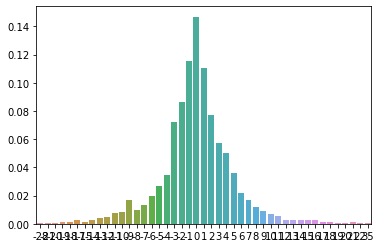

In [5]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm

filename_nhgis_block = 'franklin/nhgis/franklin_nhgis_tract.csv'
nhgis_block = pd.read_csv(filename_nhgis_block)

hist1_nhgis = nhgis_block[['H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']]
hist1_nhgis = hist1_nhgis.rename(columns={'H72003_sf': '1', 'H72004_sf': '2', 'H72005_sf': '3', 'H72006_sf': '4', 'H72007_sf': '5', 'H72008_sf': '6', 
                                          'H72009_sf': '7'})
hist2_nhgis = nhgis_block[['H72003_dp', 'H72004_dp', 'H72005_dp', 'H72006_dp', 'H72007_dp', 'H72008_dp', 'H72009_dp']]
hist2_nhgis = hist2_nhgis.rename(columns={'H72003_dp': '1', 'H72004_dp': '2', 'H72005_dp': '3', 'H72006_dp': '4', 'H72007_dp': '5', 'H72008_dp': '6', 
                                          'H72009_dp': '7'})

noise = hist2_nhgis - hist1_nhgis

probabilities = noise.stack().value_counts(normalize=True)    
sns.barplot(probabilities.index, probabilities.values)

data = noise.values.ravel()
mu, std = norm.fit(data)
print(mu, std)

In [6]:
# block (April)
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd

filename_nhgis = 'franklin/nhgis/nhgis_ppdd_20210428_12-2_block_OH.csv'
data_nhgis = pd.read_csv(filename_nhgis)
data_nhgis["STATE"] = data_nhgis["gisjoin"].str.slice(1, 3)
data_nhgis['COUNTY'] = data_nhgis["gisjoin"].str.slice(4, 7)
data_nhgis['TRACT'] = data_nhgis["gisjoin"].str.slice(8, 14)
data_nhgis['BLOCK'] = data_nhgis["gisjoin"].str.slice(14, 18)
data_nhgis['GEOID10'] = data_nhgis[['STATE', 'COUNTY', 'TRACT', 'BLOCK']].apply(lambda x: ''.join(x), axis=1)
data_nhgis = data_nhgis[data_nhgis["COUNTY"] == '049']
data_nhgis = data_nhgis[['GEOID10', 'H72003_dp', 'H72004_dp', 'H72005_dp', 'H72006_dp', 'H72007_dp', 'H72008_dp', 'H72009_dp', 
                         'H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']]
data_nhgis = data_nhgis.loc[(data_nhgis[['H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']] != 0).any(1)]
data_nhgis.to_csv("franklin/nhgis/franklin_nhgis_block_20210428.csv", index=False)
data_nhgis

/content/gdrive/My Drive/Colab Notebooks/census_privacy


,GEOID10,H72003_dp,H72004_dp,H72005_dp,H72006_dp,H72007_dp,H72008_dp,H72009_dp,H72003_sf,H72004_sf,H72005_sf,H72006_sf,H72007_sf,H72008_sf,H72009_sf
97999,390490001101001,2,0,0,0,0,0,1,1,0,0,0,0,0,1
98000,390490001101002,40,5,0,3,0,0,0,45,0,0,0,0,0,0
98001,390490001101003,49,2,0,2,0,1,1,51,4,0,0,0,0,0
98002,390490001101004,47,0,0,0,0,0,1,48,0,0,0,0,0,0
98003,390490001101005,47,0,0,0,0,0,1,51,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120742,390490107001015,89,18,0,0,0,2,3,92,17,0,0,0,1,2
120743,390490107001016,10,1,0,0,0,1,2,9,0,0,0,0,0,0
120744,390490107001017,39,9,0,8,0,0,1,42,6,0,9,0,0,0
120747,390490107001020,164,20,0,7,1,2,3,167,20,0,7,0,1,1


/content/gdrive/My Drive/Colab Notebooks/census_privacy
-0.0039191984058778535 1.9503110194242887


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


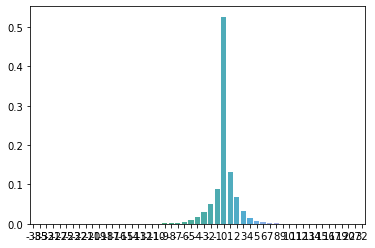

In [12]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
import statsmodels.api as sm
import pylab as py

filename_nhgis_block = 'franklin/nhgis/franklin_nhgis_block_20210428.csv'
nhgis_block = pd.read_csv(filename_nhgis_block)

hist1_nhgis = nhgis_block[['H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']]
hist1_nhgis = hist1_nhgis.rename(columns={'H72003_sf': '1', 'H72004_sf': '2', 'H72005_sf': '3', 'H72006_sf': '4', 'H72007_sf': '5', 'H72008_sf': '6', 
                                          'H72009_sf': '7'})
hist2_nhgis = nhgis_block[['H72003_dp', 'H72004_dp', 'H72005_dp', 'H72006_dp', 'H72007_dp', 'H72008_dp', 'H72009_dp']]
hist2_nhgis = hist2_nhgis.rename(columns={'H72003_dp': '1', 'H72004_dp': '2', 'H72005_dp': '3', 'H72006_dp': '4', 'H72007_dp': '5', 'H72008_dp': '6', 
                                          'H72009_dp': '7'})

noise = hist2_nhgis - hist1_nhgis

probabilities = noise.stack().value_counts(normalize=True)    
sns.barplot(probabilities.index, probabilities.values)

data = noise.values.ravel()
mu, std = norm.fit(data)
print(mu, std)

# sm.qqplot(data, line ='45')
# py.show()

In [8]:
# block group (April)
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd

filename_nhgis = 'franklin/nhgis/nhgis_ppdd_20210428_12-2_tract.csv'
data_nhgis = pd.read_csv(filename_nhgis)
data_nhgis["STATE"] = data_nhgis["gisjoin"].str.slice(1, 3)
data_nhgis['COUNTY'] = data_nhgis["gisjoin"].str.slice(4, 7)
data_nhgis['TRACT'] = data_nhgis["gisjoin"].str.slice(8, 14)
data_nhgis['BG'] = data_nhgis["gisjoin"].str.slice(14, 15)
data_nhgis['GEOID10'] = data_nhgis[['STATE', 'COUNTY', 'TRACT', 'BG']].apply(lambda x: ''.join(x), axis=1)
data_nhgis = data_nhgis[(data_nhgis["STATE"] == '39') & (data_nhgis["COUNTY"] == '049')]
data_nhgis = data_nhgis[['GEOID10', 'H72003_dp', 'H72004_dp', 'H72005_dp', 'H72006_dp', 'H72007_dp', 'H72008_dp', 'H72009_dp', 
                         'H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']]
data_nhgis = data_nhgis.loc[(data_nhgis[['H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']] != 0).any(1)]
data_nhgis.to_csv("franklin/nhgis/franklin_nhgis_bg_20210428.csv", index=False)
data_nhgis

/content/gdrive/My Drive/Colab Notebooks/census_privacy


,GEOID10,H72003_dp,H72004_dp,H72005_dp,H72006_dp,H72007_dp,H72008_dp,H72009_dp,H72003_sf,H72004_sf,H72005_sf,H72006_sf,H72007_sf,H72008_sf,H72009_sf
51439,39049000110,3212,42,9,49,0,22,41,3217,40,2,36,0,13,36
51440,39049000120,3000,52,0,35,0,1,58,3016,44,3,42,1,7,49
51441,39049000210,2780,55,2,33,0,8,66,2773,52,5,32,0,10,63
51442,39049000220,3538,28,5,61,1,20,60,3536,32,4,55,0,24,76
51443,39049000310,2143,728,8,60,0,66,150,2135,739,3,70,2,61,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51718,39049010500,6504,103,2,1178,0,41,128,6499,108,4,1179,1,43,119
51719,39049010601,3935,136,4,448,0,15,95,3933,128,3,453,0,32,95
51720,39049010602,5489,180,5,425,0,51,128,5486,157,9,420,0,54,113
51721,39049010700,1056,124,0,67,3,23,57,1062,119,4,61,1,19,33


/content/gdrive/My Drive/Colab Notebooks/census_privacy


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.004024144869215292 10.230934268160315


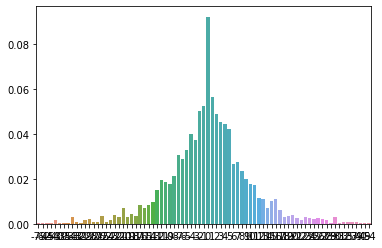

In [13]:
%cd "/content/gdrive/My Drive/Colab Notebooks/census_privacy"
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
import statsmodels.api as sm
import pylab as py

filename_nhgis_block = 'franklin/nhgis/franklin_nhgis_bg_20210428.csv'
nhgis_block = pd.read_csv(filename_nhgis_block)

hist1_nhgis = nhgis_block[['H72003_sf', 'H72004_sf', 'H72005_sf', 'H72006_sf', 'H72007_sf', 'H72008_sf', 'H72009_sf']]
hist1_nhgis = hist1_nhgis.rename(columns={'H72003_sf': '1', 'H72004_sf': '2', 'H72005_sf': '3', 'H72006_sf': '4', 'H72007_sf': '5', 'H72008_sf': '6', 
                                          'H72009_sf': '7'})
hist2_nhgis = nhgis_block[['H72003_dp', 'H72004_dp', 'H72005_dp', 'H72006_dp', 'H72007_dp', 'H72008_dp', 'H72009_dp']]
hist2_nhgis = hist2_nhgis.rename(columns={'H72003_dp': '1', 'H72004_dp': '2', 'H72005_dp': '3', 'H72006_dp': '4', 'H72007_dp': '5', 'H72008_dp': '6', 
                                          'H72009_dp': '7'})

noise = hist2_nhgis - hist1_nhgis

probabilities = noise.stack().value_counts(normalize=True)    
sns.barplot(probabilities.index, probabilities.values)

data = noise.values.ravel()
mu, std = norm.fit(data)
print(mu, std)

# sm.qqplot(data, line ='45')
# py.show()